# Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

## Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# CARGA DEL CONJUNTO DE DATOS

In [2]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

#################################################################
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
# !pip install --upgrade --force-reinstall --no-deps kaggle
#################################################################

# from google.colab import files

# # Subir el archivo kaggle.json desde tu sistema local a Google Colab
# uploaded = files.upload()

# # Mover el archivo kaggle.json a la ubicación correcta y establecer permisos
# import shutil
# shutil.move("kaggle.json", "/root/.kaggle/")
# !chmod 600 /root/.kaggle/kaggle.json

#################################################################
# Creamos un directorio en el que copiamos el fichero kaggle.json
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
#################################################################

#################################################################
# # Ya podemos listar los datasets disponibles en kaggle para su descarga
# !kaggle datasets list
#################################################################

#################################################################
# # Descargar el dataset
# # !kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset
#################################################################

#################################################################
# # Establezco una ruta absoluta a un directorio existente de mi Google Drive
# BASE_FOLDER = "/content/drive/MyDrive/MASTER_IA/Deep_learning/Proyecto_programación"
#################################################################

#################################################################
# # Creemos un directorio para descomprimir los datos
# !mkdir my_dataset
#################################################################

#################################################################
# # Conectamos con nuestro Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
#################################################################

# !mkdir $BASE_FOLDER

#################################################################
# # !cp yoga-posture-dataset.zip $BASE_FOLDER
#################################################################

#################################################################
# # # Descomprimimos
# # !cd $BASE_FOLDER
# # !unzip yoga-posture-dataset.zip -d $BASE_FOLDER
#################################################################


In [1]:
BASE_FOLDER = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/MASTER Inteligencia artificial/07_Deep_Learning/Proyecto_programación"

BF = "C:/Users/plane/OneDrive/Escritorio/img_DL_proyect"

# INSPECCIÓN DEL CONJUNTO DE DATOS

In [2]:
# Imports necesarios
from imutils import paths
from random import choice
import cv2
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.regularizers import l2, l1

In [3]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.9.0'

In [4]:
import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print()
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print("GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))

Tensor Flow Version: 2.9.0

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available
GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import os
os.environ["tf_gpu_allocator"]="cuda_malloc_async"

In [6]:
from pathlib import Path
base_folder = Path(BF)
dataset = {pose.name: len(list(pose.glob('*'))) for pose in base_folder.iterdir() if pose.is_dir()}

from tabulate import tabulate
print(f'Número de categorías: {len(dataset)}, total de ficheros:{sum(dataset.values())}')
table = tabulate(dataset.items(), headers=["Postura", "Número de imágenes"])
print(table)

Número de categorías: 47, total de ficheros:2758
Postura                          Número de imágenes
-----------------------------  --------------------
Adho Mukha Svanasana                             74
Adho Mukha Vrksasana                             65
Alanasana                                        18
Anjaneyasana                                     71
Ardha Chandrasana                                59
Ardha Matsyendrasana                             96
Ardha Navasana                                   13
Ardha Pincha Mayurasana                          54
Ashta Chandrasana                                12
Baddha Konasana                                  81
Bakasana                                         84
Balasana                                         79
Bitilasana                                       94
Camatkarasana                                    62
Dhanurasana                                      54
Eka Pada Rajakapotasana                          53
Garudasana     

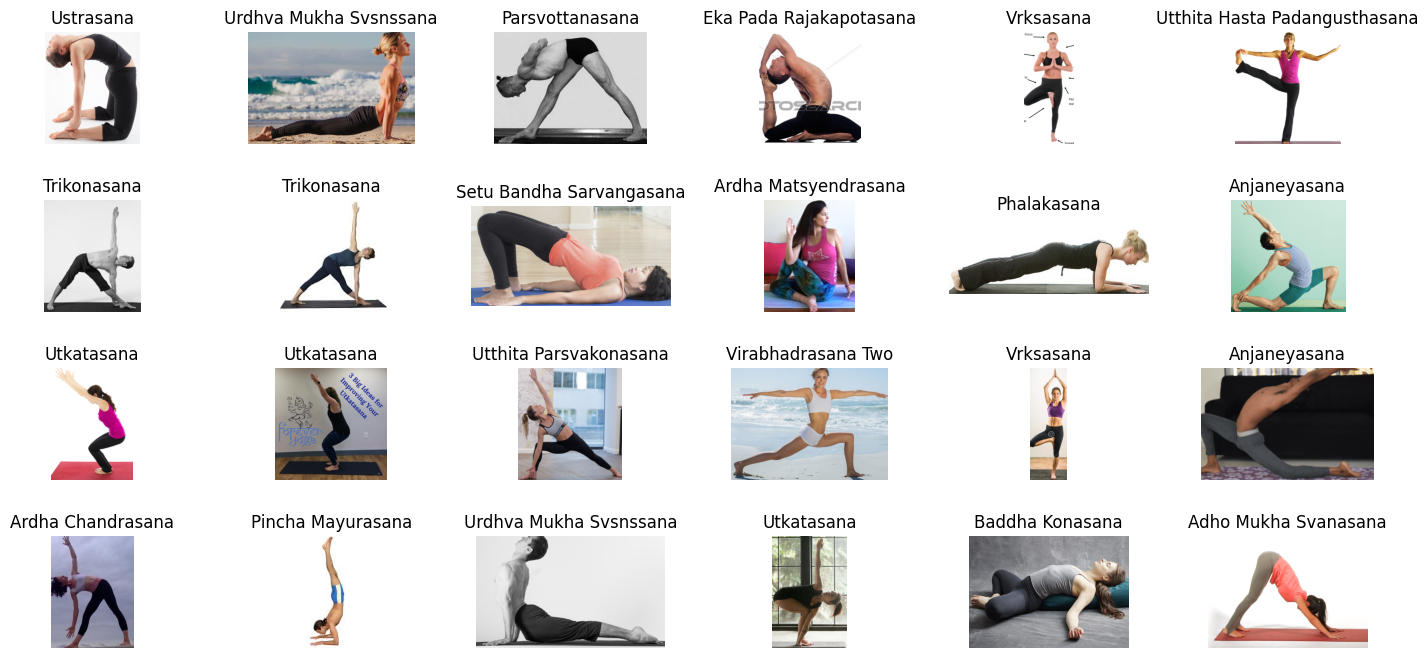

In [7]:
# Crea una lista de rutas de archivo para todas las imágenes en la carpeta base
# real_path = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/MASTER Inteligencia artificial/07_Deep_Learning/Proyecto_programación/"

all_images = list(paths.list_images(BF))
posible_choices = all_images.copy()

n_rows = 4
n_cols = 6
plt.figure(figsize=(n_cols * 3, n_rows * 2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        random_img = choice(posible_choices)
        posible_choices.remove(random_img)

        img = cv2.imread(random_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Agrega esta línea

        plt.imshow(img)
        plt.axis('off')
        plt.title(Path(random_img).parents[0].name)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
import collections

categories_dict = collections.defaultdict(list)
for path in all_images:
    categories_dict[Path(path).parents[0].name].append(path)
categories_dict = dict(categories_dict)

In [9]:
image_paths = []
categories = []
for category, paths in categories_dict.items():
  image_paths.extend(paths)
  categories.extend([category] * len(paths))

df = pd.DataFrame({'image_path':image_paths, 'category':categories})
# display(df.head())
numero_de_clases = df['category'].nunique()
print(f'La cantidad de clases a predecir: {numero_de_clases}\n')
print('Los porcentajes de cada clase')

full_strata = (round(df['category'].value_counts(normalize= True)*100, 3)).sort_values(ascending= False)
display(full_strata)

La cantidad de clases a predecir: 47

Los porcentajes de cada clase


category
Ardha Matsyendrasana             3.483
Ustrasana                        3.483
Bitilasana                       3.411
Garudasana                       3.084
Bakasana                         3.048
Utkatasana                       2.939
Baddha Konasana                  2.939
Vasisthasana                     2.903
Balasana                         2.866
Padmasana                        2.794
Adho Mukha Svanasana             2.685
Urdhva Dhanurasana               2.685
Salamba Sarvangasana             2.649
Malasana                         2.649
Uttanasana                       2.576
Anjaneyasana                     2.576
Halasana                         2.576
Utthita Parsvakonasana           2.504
Urdhva Mukha Svsnssana           2.504
Virabhadrasana Three             2.504
Vrksasana                        2.467
Setu Bandha Sarvangasana         2.395
Phalakasana                      2.395
Adho Mukha Vrksasana             2.358
Utthita Hasta Padangusthasana    2.322
Virabhadrasana O

# ACONDICIONAMIENTO DE DATOS

## PARTICION DE LOS DATOS: HOLDOUT SPLIT

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import cv2

X_path, y = df['image_path'], df['category']


def cargar_imagenes(array_de_paths, image_size= (64, 64)):
  X_img = []
  for path in np.array(array_de_paths):
    img = cv2.imread(path)
    img = cv2.resize(img, image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32)/255.0)
    X_img.append(img)
  return X_img # np.array

import time
init_time = time.time()
X = cargar_imagenes(X_path)
end_time = time.time()
print(end_time - init_time)

57.380133867263794


In [12]:
!nvidia-smi

Fri Nov 17 22:26:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.42                 Driver Version: 537.42       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8              10W /  41W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

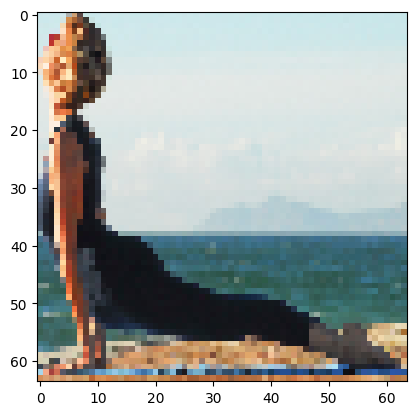

In [13]:
# print(len(X_path))
import matplotlib.pyplot as plt
plt.imshow(X[2000])
plt.show()

In [14]:
X = np.array(X)
y = np.array(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                              shuffle= True,
                                                              stratify=y,
                                                              test_size= 0.2,
                                                              random_state= 42,
                                                              )

print('[INFO]: Comprobando particion externa de datos: ...')
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

[INFO]: Comprobando particion externa de datos: ...
(2204, 64, 64, 3) (2204,)
(552, 64, 64, 3) (552,)


In [15]:
# comprobando la estratificación de la muestra
print('[INFO]: Comprobando estratificación de la muestra: ...')
stratified_prove = np.unique(y_train_full, return_counts= True)
split_strata = pd.DataFrame({'category': stratified_prove[0], 'strata_%':(stratified_prove[1]/sum(stratified_prove[1]))*100}).sort_values(by= 'strata_%', ascending = False)

display(split_strata)
coincidencia = sum(split_strata['category'] == full_strata.index)/len(split_strata)
print(f'\nLa estratificación de la particion coincide en un {round(coincidencia*100, 3)}% con la estratificación original')

[INFO]: Comprobando estratificación de la muestra: ...


,category,strata_%
5,Ardha Matsyendrasana,3.493648
37,Ustrasana,3.493648
12,Bitilasana,3.402904
16,Garudasana,3.085299
10,Bakasana,3.039927
38,Utkatasana,2.949183
9,Baddha Konasana,2.949183
42,Vasisthasana,2.903811
11,Balasana,2.858439
22,Padmasana,2.813067



La estratificación de la particion coincide en un 76.596% con la estratificación original


## PARTICIÓN INTERNA DE DATOS

In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train_full)
y_test_ohe = lb.transform(y_test)
print(y_train_ohe.shape)
print(y_train_ohe[0])

(2204, 47)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_ohe,
                                                  shuffle= True,
                                                  stratify=y_train_full,
                                                  test_size= 0.1,
                                                  random_state= 42,
                                                  )

print('[INFO]: Comprobando particion interna de datos: ...')
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

[INFO]: Comprobando particion interna de datos: ...
(1983, 64, 64, 3) (1983, 47)
(221, 64, 64, 3) (221, 47)


# DESARROLLANDO DIFERENTES ARQUIETECTURAS Y ENTRENANDOLAS

## ARQUITECTURA 1

### CREANDO EL MODELO

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import random
from tensorflow.random import set_seed
set_seed(42)

from functools import partial

DefaultConv2D = partial(layers.Conv2D,
                        kernel_size= 3,
                        padding= 'same',
                        activation= 'relu',
                        kernel_initializer = 'he_normal')
cnn_1 = Sequential([

    # BASE MODEL
    # bloque convolucional 1
    DefaultConv2D(filters= 32, input_shape= [64, 64, 3]),
    layers.MaxPool2D(pool_size= 2),

    # bloque convolucional 2
    DefaultConv2D(filters= 64),
    layers.MaxPool2D(pool_size= 2),

    # # bloque convolucional 3
    # DefaultConv2D(filters= 256),
    # layers.MaxPool2D(pool_size= 2),

    # BASE MODEL
    layers.Flatten(),
    # layers.Dense(512, activation= 'relu', kernel_initializer= 'he_normal'),
    # layers.Dropout(0.3),
    # layers.Dense(256, activation= 'relu', kernel_initializer= 'he_normal'),
    # layers.Dropout(0.3),
    layers.Dense(128, activation= 'relu', kernel_initializer= 'he_normal'),
    layers.Dropout(0.3),
    layers.Dense(47, activation= 'softmax')

])

cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2

## COMPILANDO EL MODELO

In [19]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate= 0.0001, 
                 beta_1= 0.5)

cnn_1.compile(optimizer= optimizer,
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

## ENTRENANDO EL MODELO

In [20]:
epochs = 100
set_seed(42)
H = cnn_1.fit(X_train, y_train,
              epochs = epochs,
              batch_size= 32,
              validation_data= (X_val, y_val))

Epoch 1/100


: 